# Fine-Tuning ResNet-18

A lot of the code is from here: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/colab_projects/cocoapi/notebooks/

/content/drive/MyDrive/colab_projects/cocoapi/notebooks


## CONFIG

In [179]:
WEIGHT_DECAY=1
DROPOUT=0.8

MODEL_NAME = f'2-layer-head_dropout={DROPOUT}_wd={WEIGHT_DECAY}_2021-06-16'
MODEL_NAME

'2-layer-head_dropout=0.8_wd=1_2021-06-16'

## Model Descriptions

* batch size: 32
* augmentation
    * baseline train transforms: **at the beginning**
        1. resize (224x224)
        2. RandomHorizontalFlip(p=0.5)
        3. Normalize (ImageNet constants)
    * SimCLR train transforms: starting from **strong-aug-longer-Adam-2021-06-14**
        1. resize (224x224) - the only step not like in SimCLR
        2. Random Horizontal Flip
        3. Random  Color Distortion
        4. Random Gaussian Blur
    * dev transforms: **always for dev set**
        1. resize (224x224)
        2. Normalize (ImageNet constants)


### baseline-2021-06-08

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: **SGD(lr=1e-3)**
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* weight_decay=0
* momentum=0.9
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: **SGD(lr=1e-4)**
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* weight_decay=0
* **momentum=0**

### baseline-2021-06-09

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: **SGD(lr=1e-3, momentum=0.9)**
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* weight_decay=0
* momentum=0.9
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: **SGD(lr=1e-4, momentum=0.9)**
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* weight_decay=0
* **momentum=0.9**

### baseline-Adam-2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: **Adam(lr=1e-3)**
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* weight_decay=0
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: **Adam(lr=1e-4)**
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=0**

### Adam_wd=1e-08_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1e-8**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1e-8**

### Adam_wd=0.0001_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1e-4**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1e-4**

### Adam_wd=0.01_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1e-2**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1e-2**

### Adam_wd=1_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1**

### Adam_wd=10_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=10**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=10**

### Adam_wd=100_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=100**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=100**

### strong-aug-Adam-2021-06-14

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=0**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=0**

### strong-aug-longer-Adam-2021-06-14

Last layer training
* **epochs: 6 (0, ..., 5)**
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(**step_size=4**, gamma=0.1)
* learning rate alpha:
    * **epochs 0, 1, 2, 3**: 1e-3
    * **epochs 4, 6**: 1e-4
* weight_decay=0
    
All layers training
* **epochs: 14 (6, 8, ..., 19)**
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=7**, gamma=0.1)
* learning rate alpha:
    * **epochs 6, ..., 12: 1e-4**
    * **epochs 13, ..., 19: 1e-5**
* weight_decay=0

Use **SimCLR_train_transforms** instead of **baseline_train_transforms** for training.

### strong-aug-even-longer-Adam-2021-06-14

Last layer training
* **epochs: 12 (0, ..., 1)**
* **optimizer: Adam(lr=1e-2)**
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: **1e-2**
    * **epochs 4, 4, 6, 7: 1e-3**
    * **epochs 8, 9, 10, 11: 1e-4**
* weight_decay=0
    
All layers training
* **epochs: 14 (12, 8, ..., 25)**
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=7**, gamma=0.1)
* learning rate alpha:
    * **epochs 12, ..., 18: 1e-4**
    * **epochs 19, ..., 25: 1e-5**
* weight_decay=0

### strong-aug-not-so-long-Adam-2021-06-14

Last layer training
* **epochs: 6 (0, ..., 6)**
* **optimizer: Adam(lr=1e-2)**
* scheduler: StepLR(**step_size=3**, gamma=0.1)
* learning rate alpha:
    * **epochs 0, 1, 2: 1e-2**
    * **epochs 3, 4, 5: 1e-3**
* weight_decay=0
    
All layers training
* **epochs: 10 (6, 7, ..., 15)**
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=5**, gamma=0.1)
* learning rate alpha:
    * **epochs 6, ..., 10: 1e-4**
    * **epochs 11, ..., 15: 1e-5**
* weight_decay=0

### strong-aug-not-so-long-Adam_wd=0.01_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=3, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* **weight_decay=0.01**
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=0.01**

### strong-aug-not-so-long-Adam_wd=0.1_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=3, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* **weight_decay=0.1**
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=0.1**

### strong-aug-not-so-long-Adam_wd=1_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=3, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* **weight_decay=1**
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=1**

### strong-aug-not-so-long-Adam_wd=10_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=3, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* **weight_decay=0**
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=10**

### strong-aug-not-so-long-Adam_wd=20_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=3, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* weight_decay=0*
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=20**

### strong-aug-not-so-long-Adam_wd=40_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=3, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* weight_decay=0*
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=40**

### 2-layer-head-baseline-2021-06-15

Last **2 layers** training
* **epochs: 8 (0, ..., 7)**
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(**step_size=6**, gamma=0.1)
* learning rate alpha:
    * **epochs 0, 1, 2, 3:** 1e-2
    * **epochs 4, 5, 6, 7:** 1e-3
* weight_decay=0
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=0**

### 2-layer-head_dropout=0.5_2021-06-16

Last 2 layers training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: 1e-2
    * epochs 4, 5, 6, 7: 1e-3
* weight_decay=0
* dropout_prob=0
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* weight_decay=0
* **dropout_prob=0.5**

### 2-layer-head_dropout=0.5_2021-06-16

Last 2 layers training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: 1e-2
    * epochs 4, 5, 6, 7: 1e-3
* weight_decay=0
* dropout_prob=0
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* weight_decay=0
* **dropout_prob=0.5**

### 2-layer-head_dropout=0.8_2021-06-16

Last 2 layers training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: 1e-2
    * epochs 4, 5, 6, 7: 1e-3
* weight_decay=0
* dropout_prob=0
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* weight_decay=0
* **dropout_prob=0.8**

### 2-layer-head_dropout=0.8_wd=0.1_2021-06-16

Last 2 layers training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: 1e-2
    * epochs 4, 5, 6, 7: 1e-3
* weight_decay=0
* dropout_prob=0
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=0.1**
* dropout_prob=0.8

### 2-layer-head_dropout=0.5_wd=0.2_2021-06-16

Last 2 layers training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: 1e-2
    * epochs 4, 5, 6, 7: 1e-3
* weight_decay=0
* dropout_prob=0
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=0.2**
* **dropout_prob=0.5**

### 2-layer-head_dropout=0.5_wd=1_2021-06-16

Last 2 layers training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: 1e-2
    * epochs 4, 5, 6, 7: 1e-3
* weight_decay=0
* dropout_prob=0
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=1**
* dropout_prob=0.5

### 2-layer-head_dropout=0.8_wd=1_2021-06-16

Last 2 layers training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: 1e-2
    * epochs 4, 5, 6, 7: 1e-3
* weight_decay=0
* dropout_prob=0
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=1**
* **dropout_prob=0.8**

# Before Training

## Imports

In [1]:
import os
import copy

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torchvision
from torchvision.io import read_image
from torchvision import datasets, models, transforms

from tqdm.notebook import trange, tqdm

In [2]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
%cd ../utils/

from config import CATEGORIES_OF_INTEREST
from config import IMG_SIZE, NORMALIZATION_MEAN, NORMALIZATION_STD

from my_transforms import baseline_train_transforms, SimCLR_train_transforms, dev_transforms

from my_dataloaders import CocoNoCropping

%cd ../notebooks/

/Users/gbatch/Google Drive/colab_projects/cocoapi/utils
/Users/gbatch/Google Drive/colab_projects/cocoapi/notebooks


## Transforms, Datasets, and Data Loaders

In [4]:
train1_dataset = CocoNoCropping(
    img_ids = '../my_splits/train1_ids.txt',
    my_annotations_file = '../my_annotations/imgIds_to_labels_train2017.json',
    img_dir = '../my_images/train1/',
    transform=SimCLR_train_transforms, # baseline_train_transforms
    divide_by_255=True
)

dev1_dataset = CocoNoCropping(
    img_ids = '../my_splits/dev1_ids.txt',
    my_annotations_file = '../my_annotations/imgIds_to_labels_train2017.json',
    img_dir = '../my_images/dev1/',
    transform=dev_transforms,
    divide_by_255=True
)

In [5]:
# Addressed the problem: number of images is likely not to be divisible by batch_size => reduction='sum', divide by total
example_dataloader = DataLoader(train1_dataset, batch_size=8, shuffle=True) # for visualization

train1_dataloader = DataLoader(train1_dataset, batch_size=32, shuffle=True)
dev1_dataloader = DataLoader(dev1_dataset, batch_size=32, shuffle=False)

## Visualize a few images

(228, 1810, 3)


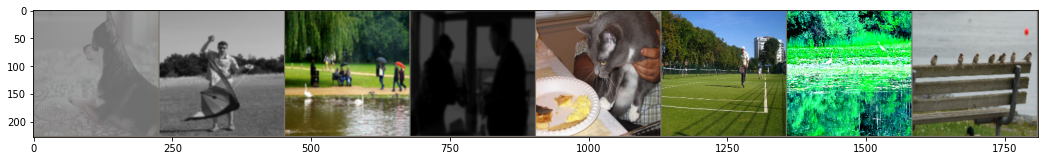

,0,1,2,3,4,5,6,7
bird,0,0,1,0,0,0,1,1
cat,0,0,0,0,1,0,0,0
dog,1,0,0,0,0,0,0,0
person,0,1,1,1,1,1,0,0


(228, 1810, 3)


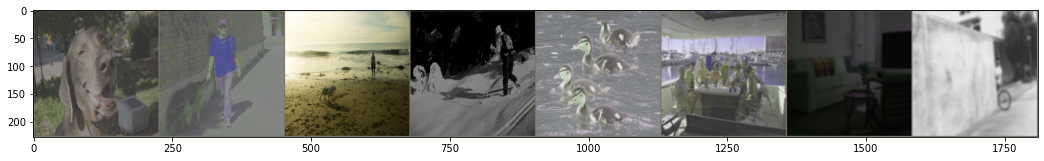

,0,1,2,3,4,5,6,7
bird,0,0,0,0,1,0,0,0
cat,0,0,0,0,0,0,0,0
dog,1,1,1,0,0,0,0,0
person,0,1,1,1,0,1,0,1


(228, 1810, 3)


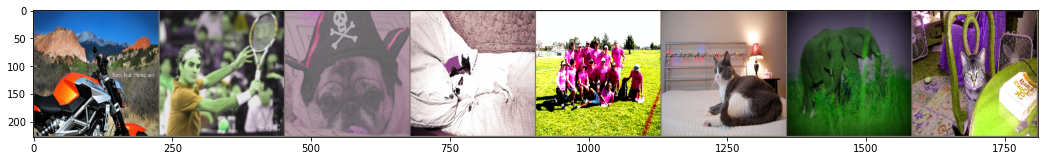

,0,1,2,3,4,5,6,7
bird,0,0,0,0,0,0,1,0
cat,0,0,0,0,0,1,0,1
dog,0,0,1,1,1,0,0,0
person,0,1,0,0,1,0,0,0


(228, 1810, 3)


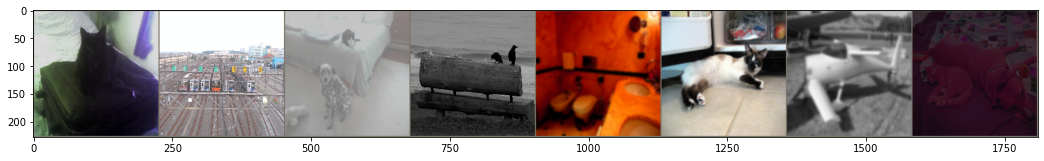

,0,1,2,3,4,5,6,7
bird,0,0,0,1,0,0,0,0
cat,1,0,1,0,0,1,0,1
dog,0,0,1,0,0,0,0,1
person,0,0,0,0,0,0,1,0


(228, 1810, 3)


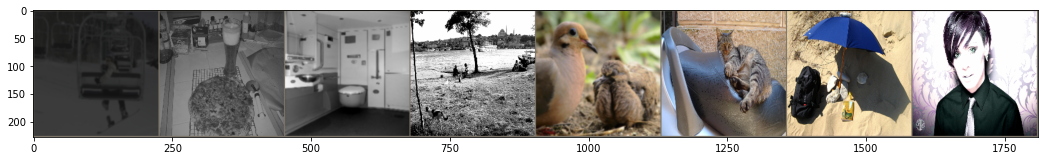

,0,1,2,3,4,5,6,7
bird,0,0,0,1,1,0,0,0
cat,0,0,0,1,0,1,0,0
dog,0,0,0,1,0,0,0,0
person,1,0,0,1,0,0,0,1


(228, 1810, 3)


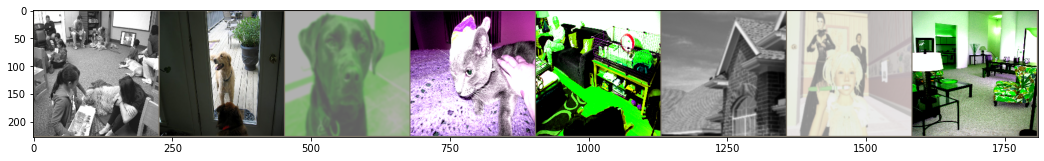

,0,1,2,3,4,5,6,7
bird,0,0,0,0,0,1,0,0
cat,0,0,0,1,0,0,0,0
dog,1,1,1,0,1,0,0,0
person,1,0,0,1,1,0,1,0


In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    print(inp.shape)
    
    # ImageNet constants
    mean = np.array(NORMALIZATION_MEAN)
    std = np.array(NORMALIZATION_STD)
    
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


LIMIT = 5
for i, batch in enumerate(example_dataloader):
    inputs, labels = batch['image'], batch['label']

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    plt.subplots(figsize=(18, 3))
    imshow(out)

    display(pd.DataFrame({CATEGORIES_OF_INTEREST[i]: labels[i].numpy() for i in range(len(labels))}).T)
    
    if i == LIMIT:
        break

## Training and Validation Loops

In [13]:
def train_one_epoch(iterator, model, criterion, optimizer):
    total = 0
    epoch_loss = 0
    per_class_correct = torch.zeros(4)
    
    for batch in tqdm(iterator, desc='train'):
        model.train()

        inputs = batch['image'].to(device) # [batch size, channel, h, w]
        #print(inputs.shape, inputs.dtype)
        # right now, `labels` is a list with num_classes tensors, each tensor with batch_size of labels (integers)
        labels = torch.vstack(batch['label']).T.contiguous().to(torch.float32).to(device)
        #print(labels.shape, labels.dtype, labels.is_contiguous()) # labels
        total += labels.shape[0]
        
        optimizer.zero_grad()

        outputs = model(inputs) #logits
        #print(outputs.shape, outputs.dtype, outputs.is_contiguous())
        #print(outputs)

        loss = criterion(outputs, labels)
        epoch_loss += loss.item() # no need to drag 
        #print(loss.item())

        loss.backward()
        optimizer_ft.step()

        preds = (outputs > 0.5).detach().to(torch.int32) # no need to drag the gradients
        #print(preds)
        per_class_correct += (preds.cpu() == labels.cpu()).sum(0) # 0-th axis for batch_size
        #print(per_class_correct)
    
    avg_epoch_loss = epoch_loss / total
    avg_per_class_acc = per_class_correct / total
    
    return avg_epoch_loss, avg_per_class_acc

In [14]:
def evaluate(iterator, model, criterion):
    total = 0
    epoch_loss = 0
    per_class_correct = torch.zeros(4)
    
    for batch in tqdm(iterator, desc='dev'):
        
        # no need for gradients, batch-norm and dropout in evaluation mode
        model.eval()
        with torch.no_grad():
            
            inputs = batch['image'].to(device) # [batch size, channel, h, w]
            #print(inputs.shape, inputs.dtype)
            # right now, `labels` is a list with num_classes tensors, each tensor with batch_size of labels (integers)
            labels = torch.vstack(batch['label']).T.contiguous().to(torch.float32).to(device)
            #print(labels.shape, labels.dtype, labels.is_contiguous()) # labels
            total += labels.shape[0]

            outputs = model(inputs) #logits
            #print(outputs.shape, outputs.dtype, outputs.is_contiguous())
            #print(outputs)

            loss = criterion(outputs, labels)
            epoch_loss += loss.item() # no need to drag 
            #print(loss.item())

            preds = (outputs > 0.5).detach().to(torch.int32) # no need to drag the gradients
            #print(preds)
            per_class_correct += (preds.cpu() == labels.cpu()).sum(0) # 0-th axis for batch_size
            #print(per_class_correct)
    
    avg_epoch_loss = epoch_loss / total
    avg_per_class_acc = per_class_correct / total
    
    return avg_epoch_loss, avg_per_class_acc

# Training

## Fine-tune only the last layer (2 layers) and save (no overfitting here)

In [76]:
device

'cuda:0'

In [78]:
# load pre-trained model
model_ft = models.resnet18(pretrained=True)

# freese all parameters
for param in model_ft.parameters():
    param.requires_grad = False
    
# replace the last layer to fit the task
#
# check how many features are just before the head
num_ftrs = model_ft.fc.in_features
#
# replace with only 1 layer
# model_ft.fc = torch.nn.Linear(num_ftrs, len(CATEGORIES_OF_INTEREST))
#
# replace with 2 layers like in SimCLR
interm_num_ftrs = 64

# print the layer dimentions of the model head  
print('Num features before the head:', num_ftrs)
print('Num intermediate features:', interm_num_ftrs)
print('Num outputs:', len(CATEGORIES_OF_INTEREST))

model_ft.fc = torch.nn.Sequential(
    torch.nn.Linear(num_ftrs, interm_num_ftrs),
    torch.nn.Dropout(p=0), # can add dropout in the middle
    torch.nn.Linear(interm_num_ftrs, len(CATEGORIES_OF_INTEREST))
)
# unfreeeze model parameters of model head
for param in model_ft.fc.parameters():
    param.requires_grad = True


# place it on the device
model_ft = model_ft.to(device)

criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=0.01) # weight_decay=WEIGHT_DECAY

# Decay LR by a factor of `gamma` every `step_size` epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=6, gamma=0.1)

Num features before the head: 512
Num intermediate features: 64
Num outputs: 4


In [79]:
#model_ft

Epoch: 0



Train Avg Acc: 0.7234375476837158
Train Loss: 3.594582921266556
Train Accs per class: tensor([0.7266, 0.7734, 0.7000, 0.6938])




Dev Avg Acc: 0.7777343988418579
Dev Loss: 2.3233722448349
Dev Accs per class: tensor([0.8328, 0.7000, 0.7812, 0.7969])


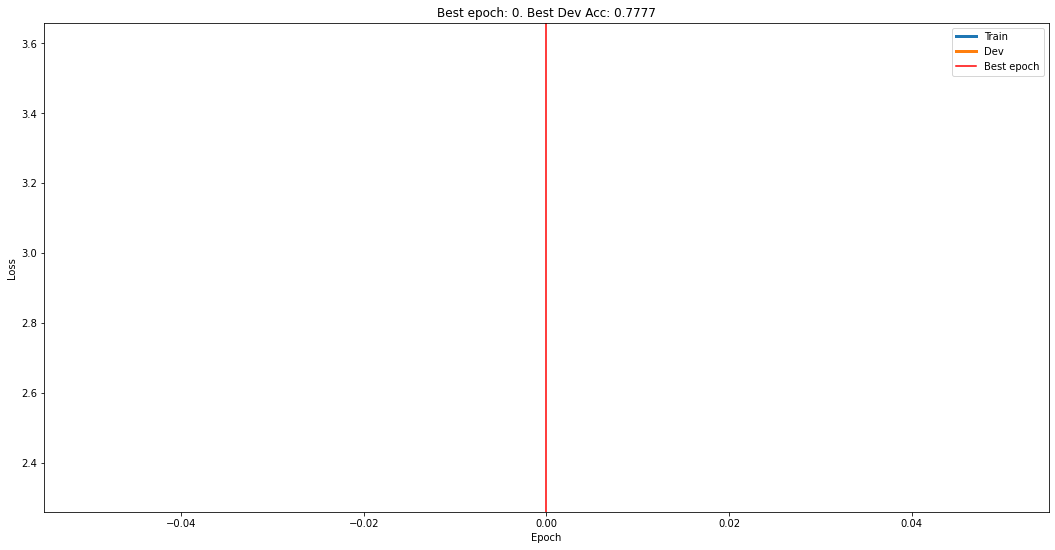


--------------------------------------------------------------------------------

Epoch: 1



Train Avg Acc: 0.8031250238418579
Train Loss: 1.8753402292728425
Train Accs per class: tensor([0.8250, 0.8250, 0.7797, 0.7828])




Dev Avg Acc: 0.831250011920929
Dev Loss: 1.554303988814354
Dev Accs per class: tensor([0.8141, 0.8766, 0.8031, 0.8313])


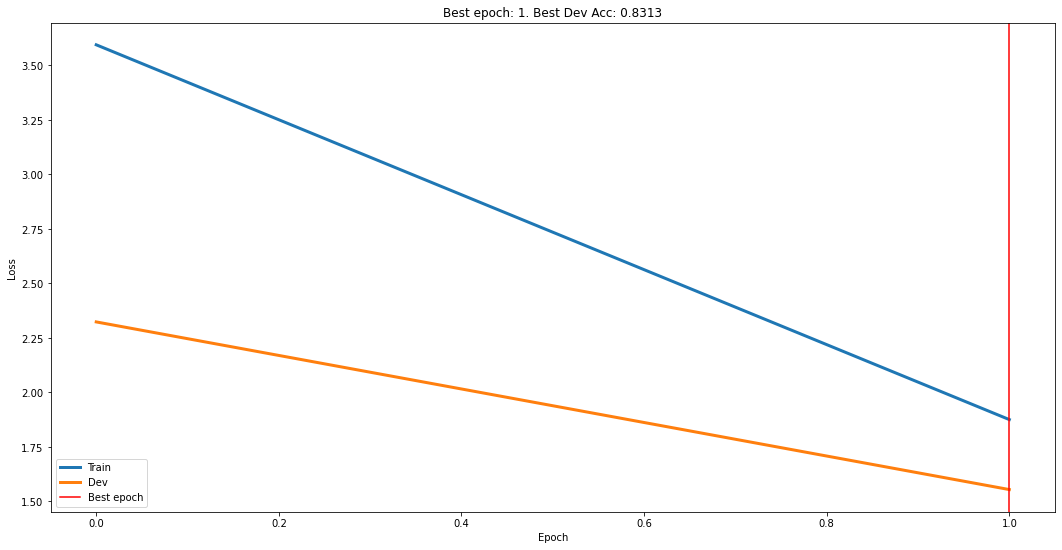


--------------------------------------------------------------------------------

Epoch: 2



Train Avg Acc: 0.8203125
Train Loss: 1.5861872613430024
Train Accs per class: tensor([0.8344, 0.8422, 0.8094, 0.7953])




Dev Avg Acc: 0.8488280773162842
Dev Loss: 1.4835033416748047
Dev Accs per class: tensor([0.8453, 0.9000, 0.8219, 0.8281])


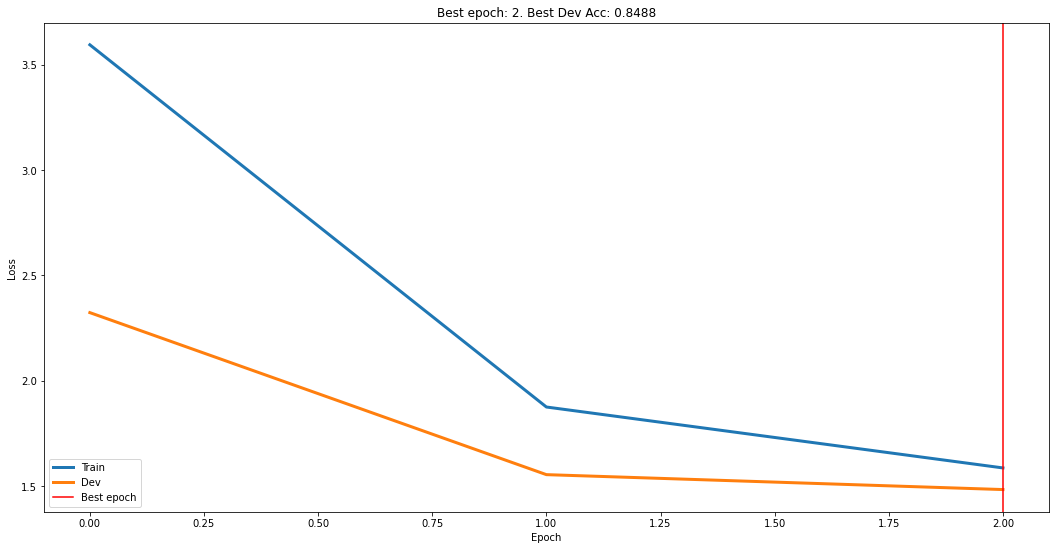


--------------------------------------------------------------------------------

Epoch: 3



Train Avg Acc: 0.8324218988418579
Train Loss: 1.5645572125911713
Train Accs per class: tensor([0.8500, 0.8656, 0.8266, 0.7875])




Dev Avg Acc: 0.8382812142372131
Dev Loss: 1.4940903633832932
Dev Accs per class: tensor([0.8391, 0.8984, 0.8156, 0.8000])


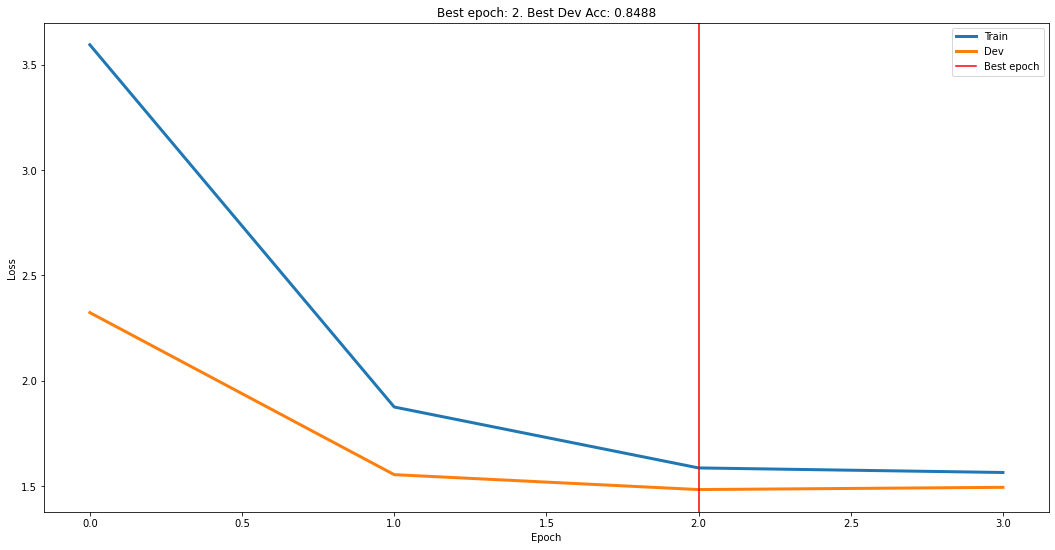


--------------------------------------------------------------------------------

Epoch: 4



Train Avg Acc: 0.83203125
Train Loss: 1.544829046726227
Train Accs per class: tensor([0.8391, 0.8609, 0.8281, 0.8000])




Dev Avg Acc: 0.83203125
Dev Loss: 1.4956883549690247
Dev Accs per class: tensor([0.8391, 0.8625, 0.8203, 0.8062])


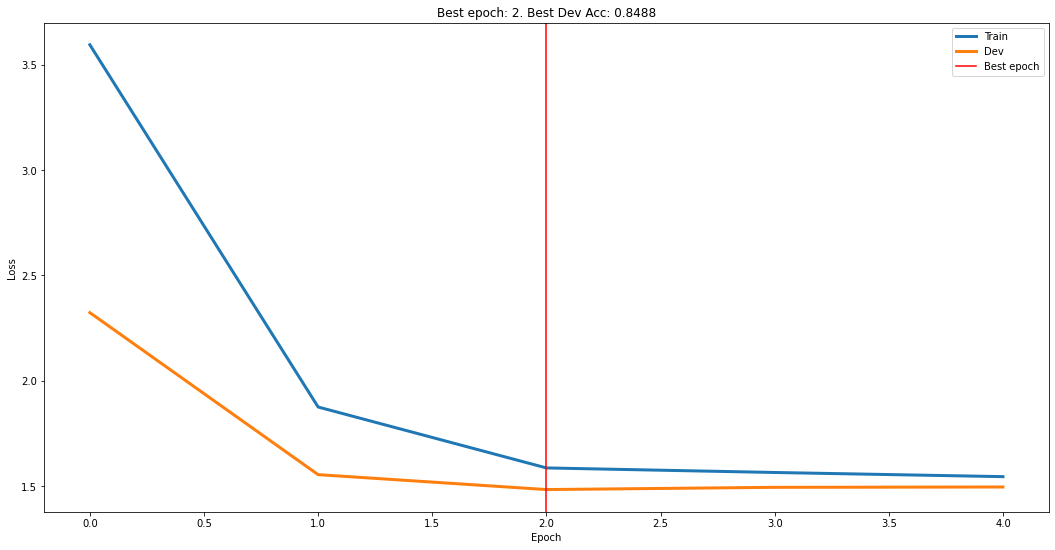


--------------------------------------------------------------------------------

Epoch: 5



Train Avg Acc: 0.8285156488418579
Train Loss: 1.5439819693565369
Train Accs per class: tensor([0.8562, 0.8453, 0.8328, 0.7797])




Dev Avg Acc: 0.8402343988418579
Dev Loss: 1.5420239627361298
Dev Accs per class: tensor([0.8313, 0.9062, 0.8266, 0.7969])


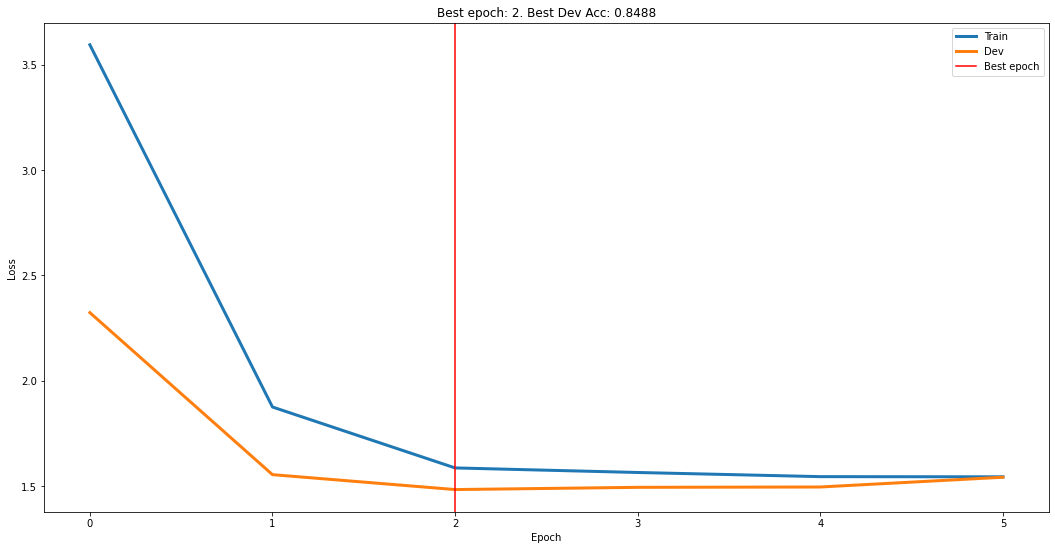


--------------------------------------------------------------------------------

Epoch: 6



Train Avg Acc: 0.844921886920929
Train Loss: 1.373488199710846
Train Accs per class: tensor([0.8578, 0.8859, 0.8422, 0.7937])




Dev Avg Acc: 0.8472656011581421
Dev Loss: 1.4393761932849884
Dev Accs per class: tensor([0.8234, 0.8922, 0.8234, 0.8500])


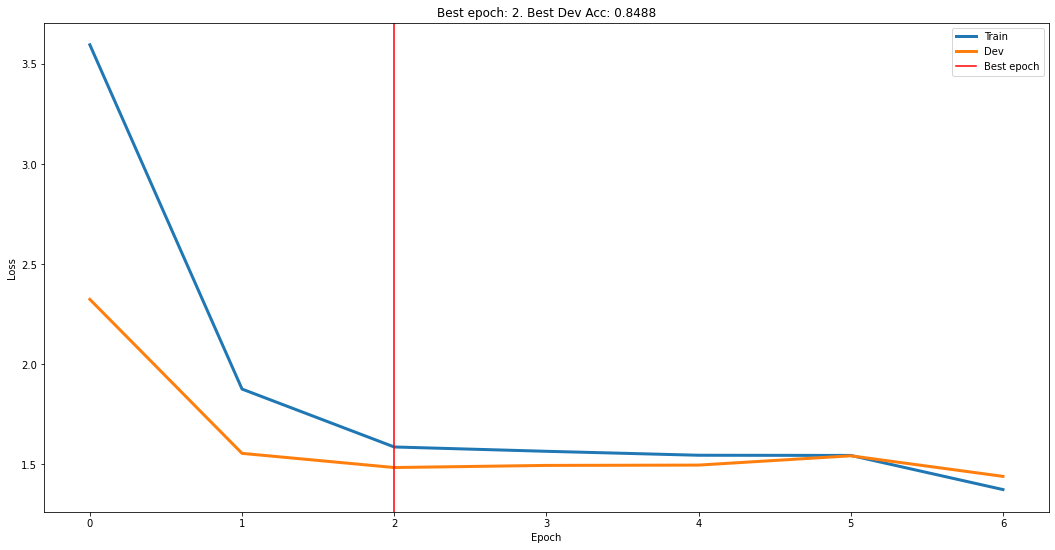


--------------------------------------------------------------------------------

Epoch: 7



Train Avg Acc: 0.8492187261581421
Train Loss: 1.350882464647293
Train Accs per class: tensor([0.8594, 0.8813, 0.8500, 0.8062])




Dev Avg Acc: 0.8539062738418579
Dev Loss: 1.395612996816635
Dev Accs per class: tensor([0.8406, 0.9047, 0.8281, 0.8422])


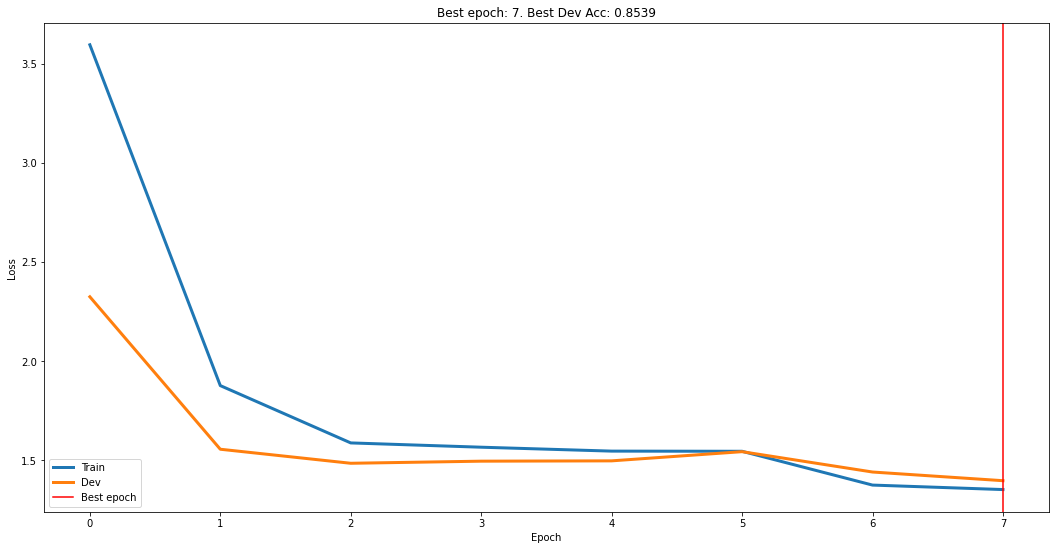


--------------------------------------------------------------------------------


CPU times: user 5min 14s, sys: 8.69 s, total: 5min 22s
Wall time: 5min 36s


In [80]:
%%time
last_layer_num_epochs = 8

train_epoch_loss_history = []
train_per_class_acc_history = []

dev_epoch_loss_history = []
dev_per_class_acc_history = []

dev_epoch_acc_history = []
train_epoch_acc_history = []

best_acc = None
best_epoch = None

best_model_wts = copy.deepcopy(model_ft.state_dict())

for epoch in trange(last_layer_num_epochs, desc='epoch'):
    print('Epoch:', epoch)
    # train
    avg_epoch_loss, avg_per_class_acc = train_one_epoch(iterator=train1_dataloader,
                                                        model=model_ft, criterion=criterion,
                                                        optimizer=optimizer_ft)
    avg_acc = avg_per_class_acc.mean().item()
    train_epoch_acc_history.append(avg_acc)
    print('Train Avg Acc:', avg_acc)
    train_epoch_loss_history.append(avg_epoch_loss)
    train_per_class_acc_history.append(avg_per_class_acc)
    print('Train Loss:', avg_epoch_loss)
    print('Train Accs per class:', avg_per_class_acc)
    print()
    
    # evaluate on the dev set
    avg_epoch_loss, avg_per_class_acc = evaluate(iterator=dev1_dataloader,
                                                 model=model_ft, criterion=criterion)
    avg_acc = avg_per_class_acc.mean().item()
    dev_epoch_acc_history.append(avg_acc)
    print('Dev Avg Acc:', avg_acc)
    dev_epoch_loss_history.append(avg_epoch_loss)
    dev_per_class_acc_history.append(avg_per_class_acc)
    print('Dev Loss:', avg_epoch_loss)
    print('Dev Accs per class:', avg_per_class_acc)
    
    
        
    if (not best_acc) or avg_acc > best_acc:
        best_epoch = epoch
        best_acc = avg_acc
        
        best_model_wts = copy.deepcopy(model_ft.state_dict())

    # lr scheduler step
    exp_lr_scheduler.step()

    # plot
    plt.figure(figsize=(18, 9))
    plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, label=f'Train', linewidth=3)
    plt.plot(np.arange(len(dev_epoch_loss_history)), dev_epoch_loss_history, label=f'Dev', linewidth=3)
    plt.axvline(x=best_epoch, label='Best epoch', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Best epoch: {best_epoch}. Best Dev Acc: {best_acc:.4}')
    plt.legend(loc='best')
    plt.show()


    print()
    print('-'*80)
    print()

### Save the model with the last layer fine-tuned - this does not change.

In [81]:
# LL_FINE_TUNED_MODEL_NAME = 'resnet18_2-layer-head_strong-aug_Adam_last-2-layers-finetuned'
# print(LL_FINE_TUNED_MODEL_NAME)
# LL_FINE_TUNED_MODEL_PATH = f'../weights/{LL_FINE_TUNED_MODEL_NAME}.pth'
# torch.save(model_ft.state_dict(), LL_FINE_TUNED_MODEL_PATH)


history = {
    'train_losses': [float(el) for el in train_epoch_loss_history],
    'dev_losses': [float(el) for el in dev_epoch_loss_history],

    'train_per_class_accuracies': [list(el.numpy().astype(float)) for el in train_per_class_acc_history],
    'dev_per_class_accuracies': [list(el.numpy().astype(float)) for el in dev_per_class_acc_history],

    'train_average_accuracies': [float(el) for el in train_epoch_acc_history],
    'dev_average_accuracies': [float(el) for el in dev_epoch_acc_history],
    
    'best_epoch': best_epoch,
    'best_acc': best_acc
}

with open(f'../history/{LL_FINE_TUNED_MODEL_NAME}.json', 'w') as f:
    json.dump(history, f)

# # load history
# with open(f'../history/{LL_FINE_TUNED_MODEL_NAME}.json') as f:
#     history = json.load(f)

# history

resnet18_2-layer-head_strong-aug_Adam_last-2-layers-finetuned


In [82]:
# load the fine-tuned model parameters
model_ft.load_state_dict(torch.load(LL_FINE_TUNED_MODEL_PATH))
print(evaluate(iterator=dev1_dataloader, model=model_ft, criterion=criterion))


(1.395612996816635, tensor([0.8406, 0.9047, 0.8281, 0.8422]))


## Fine-tune all layers with lower learning rate

In [83]:
device

'cuda:0'

In [180]:
# change dropout probability
model_ft.fc = torch.nn.Sequential(
    torch.nn.Linear(num_ftrs, interm_num_ftrs),
    torch.nn.Dropout(p=DROPOUT), # p - dropout probability
    torch.nn.Linear(interm_num_ftrs, len(CATEGORIES_OF_INTEREST))
)

model_ft.load_state_dict(torch.load(LL_FINE_TUNED_MODEL_PATH))

# unfreese all parameters
for param in model_ft.parameters():
    param.requires_grad = True

# place it on the device
model_ft = model_ft.to(device)

# criterion and optimizer
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=0.0001, weight_decay=WEIGHT_DECAY)

# Decay LR by a factor of `gamma` every `step_size` epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

In [181]:
print(MODEL_NAME)
print(evaluate(iterator=dev1_dataloader, model=model_ft, criterion=criterion))

2-layer-head_dropout=0.8_wd=1_2021-06-16



(1.395612996816635, tensor([0.8406, 0.9047, 0.8281, 0.8422]))


In [182]:
# load history from the last-layer fine-tuned model
with open(f'../history/{LL_FINE_TUNED_MODEL_NAME}.json') as f:
    history = json.load(f)
#history

Epoch: 8



Train Avg Acc: 0.8117188215255737
Train Loss: 1.936423420906067
Train Accs per class: tensor([0.8234, 0.8578, 0.7937, 0.7719])




Dev Avg Acc: 0.8578124642372131
Dev Loss: 1.4437610030174255
Dev Accs per class: tensor([0.8453, 0.9109, 0.8203, 0.8547])


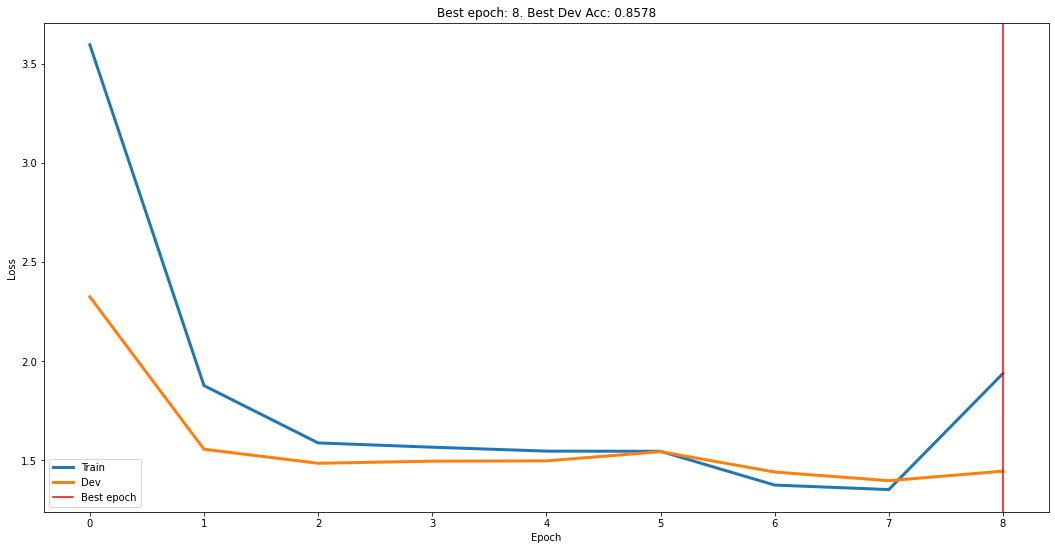


--------------------------------------------------------------------------------

Epoch: 9



Train Avg Acc: 0.831250011920929
Train Loss: 1.7497970938682557
Train Accs per class: tensor([0.8266, 0.8734, 0.8250, 0.8000])




Dev Avg Acc: 0.85546875
Dev Loss: 1.4227005779743194
Dev Accs per class: tensor([0.8578, 0.9016, 0.8188, 0.8438])


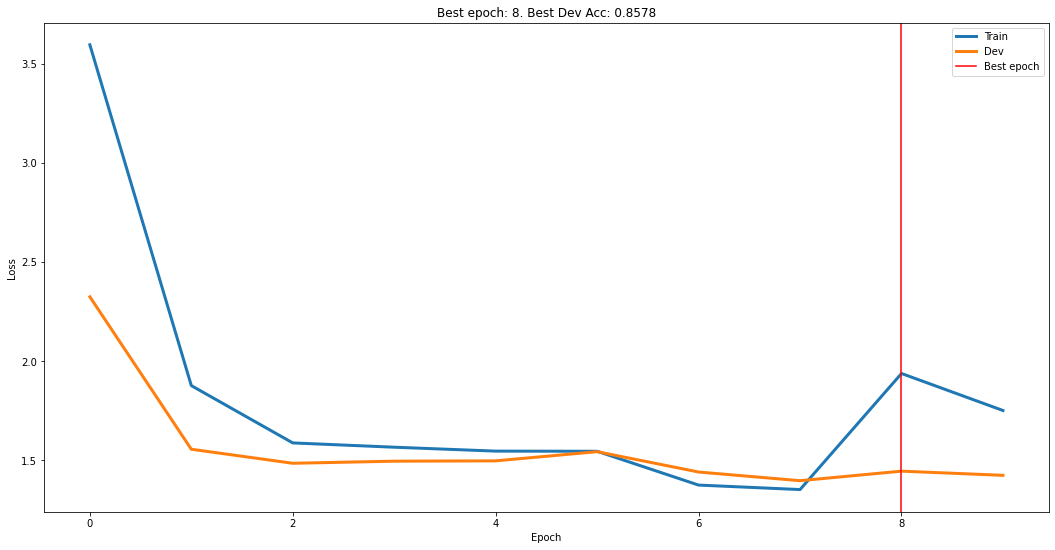


--------------------------------------------------------------------------------

Epoch: 10



Train Avg Acc: 0.854296863079071
Train Loss: 1.369942343235016
Train Accs per class: tensor([0.8375, 0.8828, 0.8531, 0.8438])




Dev Avg Acc: 0.8582031726837158
Dev Loss: 1.4042221784591675
Dev Accs per class: tensor([0.8531, 0.8906, 0.8313, 0.8578])


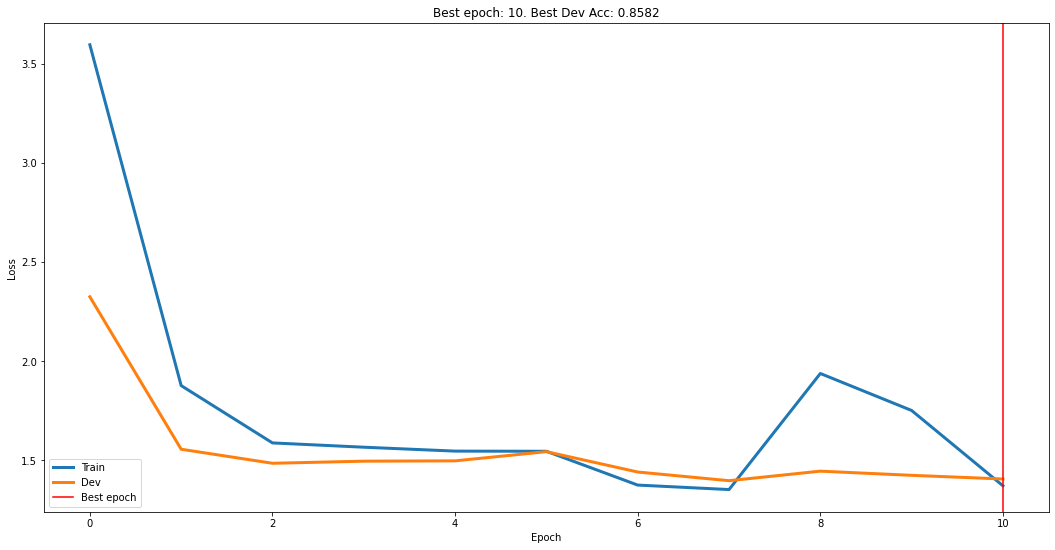


--------------------------------------------------------------------------------

Epoch: 11



Train Avg Acc: 0.8695312738418579
Train Loss: 1.3304015457630158
Train Accs per class: tensor([0.8562, 0.9031, 0.8750, 0.8438])




Dev Avg Acc: 0.8515625
Dev Loss: 1.4840057045221329
Dev Accs per class: tensor([0.8531, 0.8922, 0.8266, 0.8344])


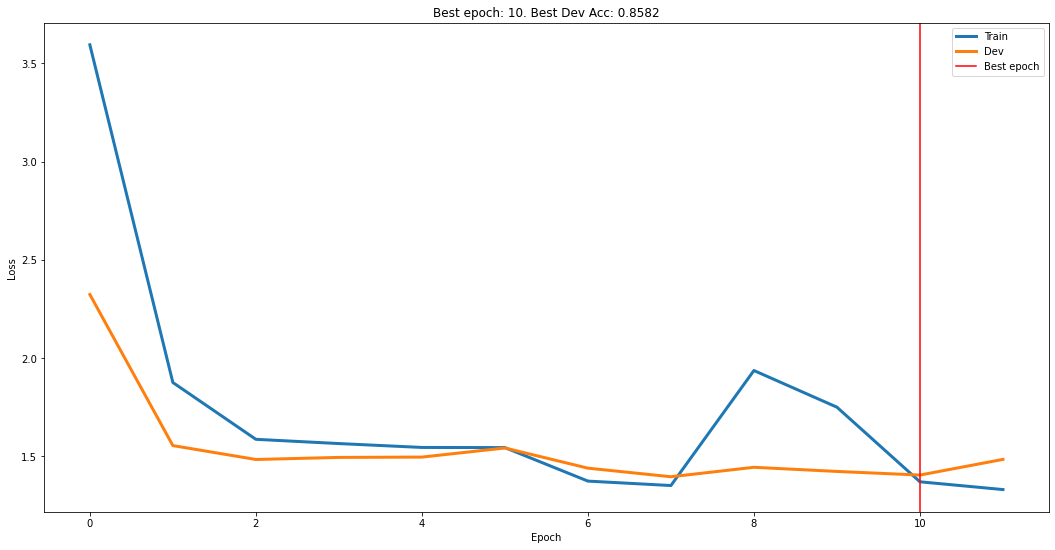


--------------------------------------------------------------------------------

Epoch: 12



Train Avg Acc: 0.887890636920929
Train Loss: 1.1708293080329895
Train Accs per class: tensor([0.8734, 0.9094, 0.8813, 0.8875])




Dev Avg Acc: 0.862500011920929
Dev Loss: 1.4300094336271285
Dev Accs per class: tensor([0.8578, 0.9078, 0.8406, 0.8438])


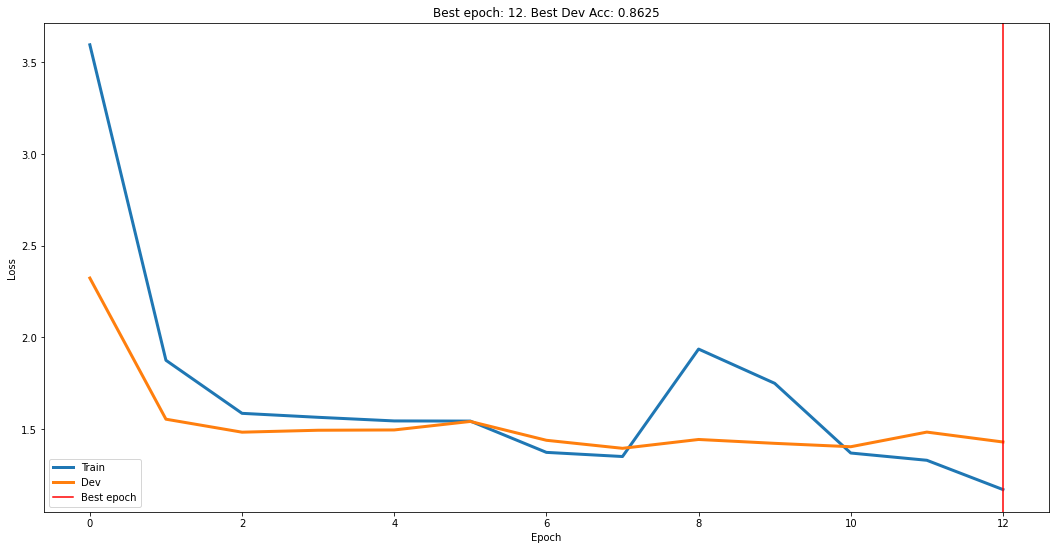


--------------------------------------------------------------------------------

Epoch: 13



Train Avg Acc: 0.8996094465255737
Train Loss: 1.1020176619291306
Train Accs per class: tensor([0.8875, 0.9219, 0.8891, 0.9000])




Dev Avg Acc: 0.8605468273162842
Dev Loss: 1.3648935288190842
Dev Accs per class: tensor([0.8594, 0.9078, 0.8297, 0.8453])


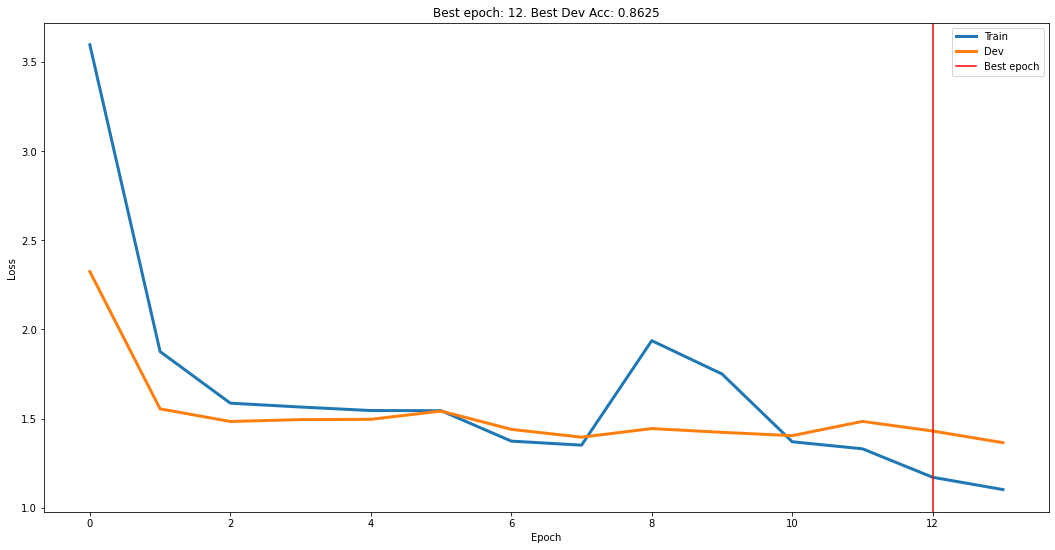


--------------------------------------------------------------------------------

Epoch: 14



Train Avg Acc: 0.889843761920929
Train Loss: 1.0719064027071
Train Accs per class: tensor([0.8969, 0.8906, 0.9016, 0.8703])




Dev Avg Acc: 0.861328125
Dev Loss: 1.3470331370830535
Dev Accs per class: tensor([0.8594, 0.9078, 0.8313, 0.8469])


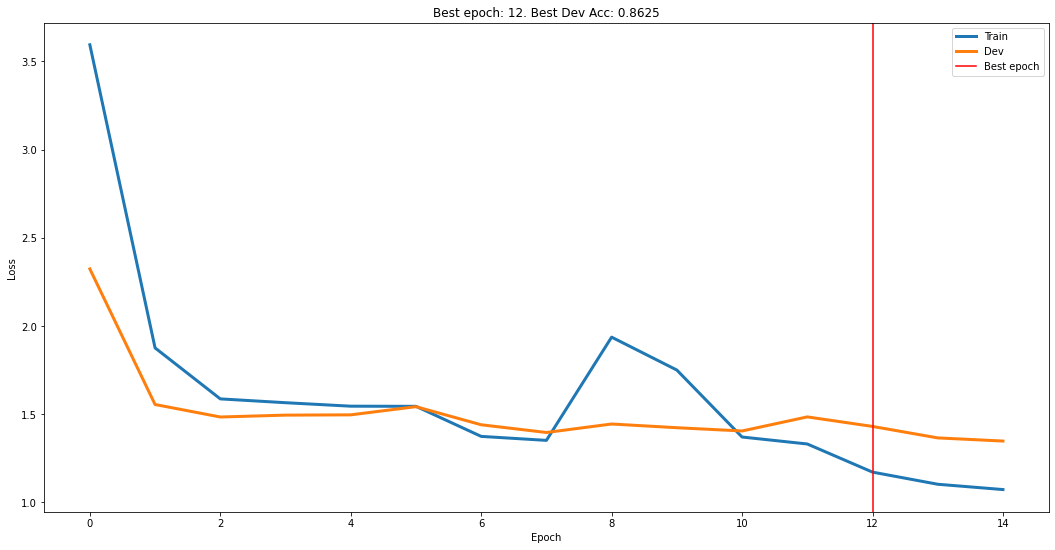


--------------------------------------------------------------------------------

Epoch: 15



Train Avg Acc: 0.904296875
Train Loss: 0.9929612517356873
Train Accs per class: tensor([0.8828, 0.9172, 0.9094, 0.9078])




Dev Avg Acc: 0.8597656488418579
Dev Loss: 1.3475939333438873
Dev Accs per class: tensor([0.8594, 0.9047, 0.8266, 0.8484])


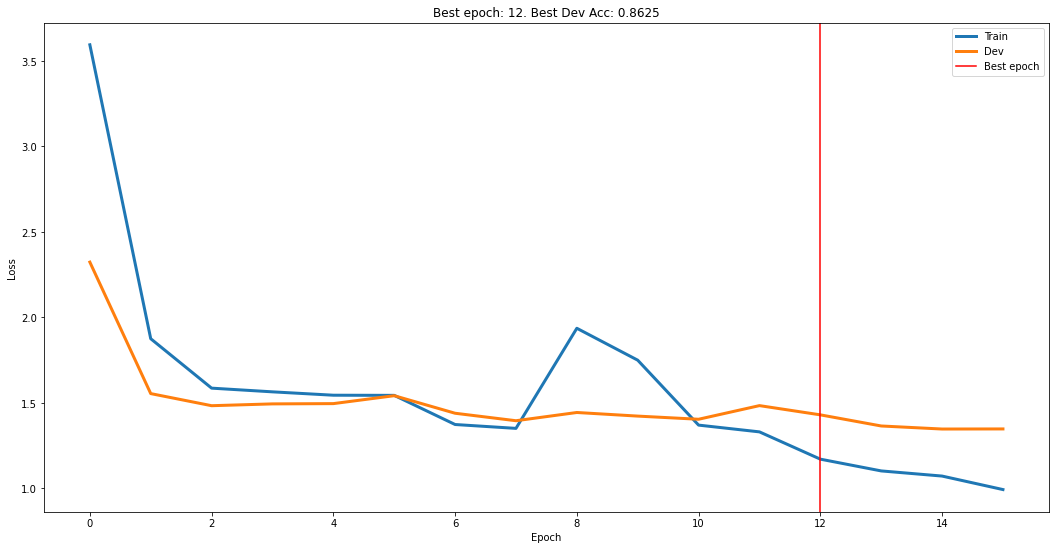


--------------------------------------------------------------------------------

Epoch: 16



Train Avg Acc: 0.916015625
Train Loss: 0.9540329813957215
Train Accs per class: tensor([0.8891, 0.9422, 0.9172, 0.9156])




Dev Avg Acc: 0.8605468273162842
Dev Loss: 1.353540226817131
Dev Accs per class: tensor([0.8672, 0.9016, 0.8234, 0.8500])


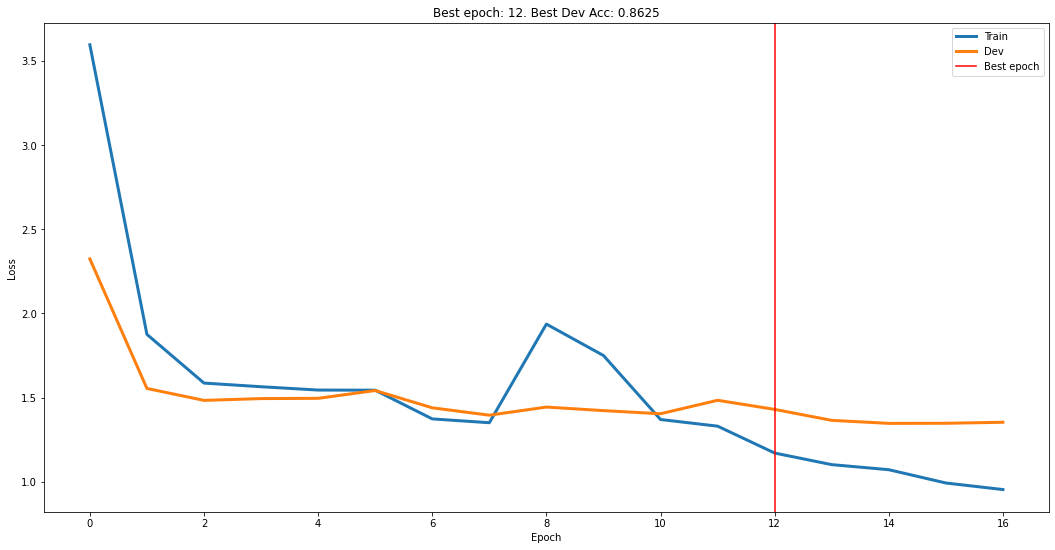


--------------------------------------------------------------------------------

Epoch: 17



Train Avg Acc: 0.9046875238418579
Train Loss: 1.033955129981041
Train Accs per class: tensor([0.8922, 0.9250, 0.8953, 0.9062])




Dev Avg Acc: 0.8628906011581421
Dev Loss: 1.3475660771131515
Dev Accs per class: tensor([0.8672, 0.9094, 0.8281, 0.8469])


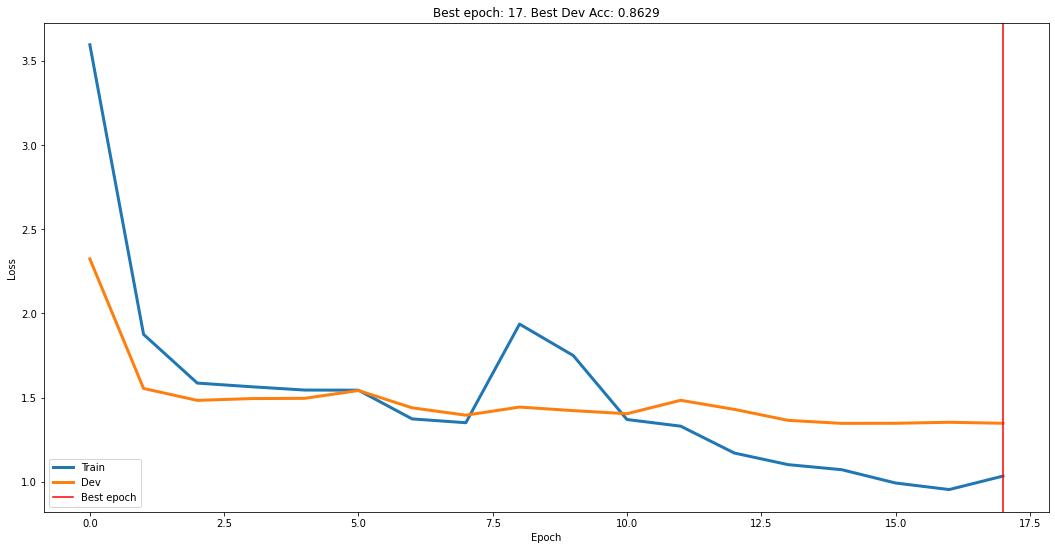


--------------------------------------------------------------------------------




In [183]:
all_layers_num_epochs = 10

train_epoch_loss_history = history['train_losses']
dev_epoch_loss_history = history['dev_losses']

train_per_class_acc_history = history['train_per_class_accuracies']
dev_per_class_acc_history = history['dev_per_class_accuracies']

dev_epoch_acc_history = history['train_average_accuracies']
train_epoch_acc_history = history['dev_average_accuracies']

best_acc = history['best_acc']
best_epoch =  history['best_epoch']

for epoch in trange(last_layer_num_epochs, last_layer_num_epochs+all_layers_num_epochs, desc='epoch'):
    print('Epoch:', epoch)
    # train
    avg_epoch_loss, avg_per_class_acc = train_one_epoch(iterator=train1_dataloader,
                                                        model=model_ft, criterion=criterion,
                                                        optimizer=optimizer_ft)
    avg_acc = avg_per_class_acc.mean().item()
    train_epoch_acc_history.append(avg_acc)
    print('Train Avg Acc:', avg_acc)
    train_epoch_loss_history.append(avg_epoch_loss)
    train_per_class_acc_history.append(avg_per_class_acc)
    print('Train Loss:', avg_epoch_loss)
    print('Train Accs per class:', avg_per_class_acc)
    print()
    
    # evaluate on the dev set
    avg_epoch_loss, avg_per_class_acc = evaluate(iterator=dev1_dataloader,
                                                 model=model_ft, criterion=criterion)
    avg_acc = avg_per_class_acc.mean().item()
    dev_epoch_acc_history.append(avg_acc)
    print('Dev Avg Acc:', avg_acc)
    dev_epoch_loss_history.append(avg_epoch_loss)
    dev_per_class_acc_history.append(avg_per_class_acc)
    print('Dev Loss:', avg_epoch_loss)
    print('Dev Accs per class:', avg_per_class_acc)
    
    if (not best_acc) or avg_acc > best_acc:
        best_epoch = epoch
        best_acc = avg_acc
        
        best_model_wts = copy.deepcopy(model_ft.state_dict())

    # lr scheduler step
    exp_lr_scheduler.step()

    # plot
    plt.figure(figsize=(18, 9))
    plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, label=f'Train', linewidth=3)
    plt.plot(np.arange(len(dev_epoch_loss_history)), dev_epoch_loss_history, label=f'Dev', linewidth=3)
    plt.axvline(x=best_epoch, label='Best epoch', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Best epoch: {best_epoch}. Best Dev Acc: {best_acc:.4}')
    plt.legend(loc='best')
    plt.show()


    print()
    print('-'*80)
    print()

### Save weights

In [184]:
%mkdir ../weights

mkdir: cannot create directory ‘../weights’: File exists


In [185]:
torch.save(model_ft.state_dict(), f'../weights/{MODEL_NAME}.pth')

In [186]:
%ls ../weights

 2-layer-head-baseline-2021-06-16.pth
'2-layer-head_dropout=0.5_2021-06-16.pth'
'2-layer-head_dropout=0.5_wd=0.2_2021-06-16.pth'
'2-layer-head_dropout=0.5_wd=1_2021-06-16.pth'
'2-layer-head_dropout=0.8_2021-06-16.pth'
'2-layer-head_dropout=0.8_wd=0.1_2021-06-16.pth'
'2-layer-head_dropout=0.8_wd=1_2021-06-16.pth'
'Adam_wd=0.0001_2021-06-11.pth'
'Adam_wd=0.01_2021-06-11.pth'
'Adam_wd=100_2021-06-11.pth'
'Adam_wd=10_2021-06-11.pth'
'Adam_wd=1_2021-06-11.pth'
'Adam_wd=1e-08_2021-06-11.pth'
 baseline-2021-06-08.pth
 baseline-2021-06-09.pth
 baseline-Adam-2021-06-11.pth
 resnet18_2-layer-head_strong-aug_Adam_last-2-layers-finetuned.pth
 resnet18-strong-aug-Adam-last-layer-finetuned.pth
 strong-aug-Adam-2021-06-14.pth
 strong-aug-even-longer-Adam-2021-06-14.pth
 strong-aug-longer-Adam-2021-06-14.pth
 strong-aug-not-so-long-Adam-2021-06-14.pth
'strong-aug-not-so-long-Adam_wd=0.01_2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=0.1_2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=10_2021-06-14.p

## Save history

In [187]:
%mkdir ../history

mkdir: cannot create directory ‘../history’: File exists


In [188]:
train_per_class_acc_history

[[0.7265625, 0.7734375, 0.699999988079071, 0.6937500238418579],
 [0.824999988079071,
  0.824999988079071,
  0.7796875238418579,
  0.7828124761581421],
 [0.8343750238418579,
  0.8421875238418579,
  0.809374988079071,
  0.7953125238418579],
 [0.8500000238418579,
  0.8656250238418579,
  0.8265625238418579,
  0.7875000238418579],
 [0.839062511920929, 0.8609374761581421, 0.828125, 0.800000011920929],
 [0.856249988079071,
  0.8453124761581421,
  0.832812488079071,
  0.7796875238418579],
 [0.8578125238418579,
  0.885937511920929,
  0.8421875238418579,
  0.793749988079071],
 [0.859375, 0.8812500238418579, 0.8500000238418579, 0.8062499761581421],
 tensor([0.8234, 0.8578, 0.7937, 0.7719]),
 tensor([0.8266, 0.8734, 0.8250, 0.8000]),
 tensor([0.8375, 0.8828, 0.8531, 0.8438]),
 tensor([0.8562, 0.9031, 0.8750, 0.8438]),
 tensor([0.8734, 0.9094, 0.8813, 0.8875]),
 tensor([0.8875, 0.9219, 0.8891, 0.9000]),
 tensor([0.8969, 0.8906, 0.9016, 0.8703]),
 tensor([0.8828, 0.9172, 0.9094, 0.9078]),
 tensor([0

In [189]:
history = {
    'train_losses': [float(el) for el in train_epoch_loss_history],
    'dev_losses': [float(el) for el in dev_epoch_loss_history],

    'train_per_class_accuracies': [list(torch.tensor(el).numpy().astype(float)) for el in train_per_class_acc_history],
    'dev_per_class_accuracies': [list(torch.tensor(el).numpy().astype(float)) for el in dev_per_class_acc_history],

    'train_average_accuracies': [float(el) for el in train_epoch_acc_history],
    'dev_average_accuracies': [float(el) for el in dev_epoch_acc_history],
    
    'best_epoch': best_epoch,
    'best_acc': best_acc
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [190]:
with open(f'../history/{MODEL_NAME}.json', 'w') as f:
    json.dump(history, f)

In [191]:
%ls ../history

 2-layer-head-baseline-2021-06-16.json
'2-layer-head_dropout=0.5_2021-06-16.json'
'2-layer-head_dropout=0.5_wd=0.2_2021-06-16.json'
'2-layer-head_dropout=0.5_wd=1_2021-06-16.json'
'2-layer-head_dropout=0.8_2021-06-16.json'
'2-layer-head_dropout=0.8_wd=0.1_2021-06-16.json'
'2-layer-head_dropout=0.8_wd=1_2021-06-16.json'
'Adam_wd=0.0001_2021-06-11.json'
'Adam_wd=0.01_2021-06-11.json'
'Adam_wd=100_2021-06-11.json'
'Adam_wd=10_2021-06-11.json'
'Adam_wd=1_2021-06-11.json'
'Adam_wd=1e-08_2021-06-11.json'
 baseline-2021-06-08.json
 baseline-2021-06-09.json
 baseline-Adam-2021-06-11.json
 dummy-classifier.json
 resnet18_2-layer-head_strong-aug_Adam_last-2-layers-finetuned.json
 resnet18-strong-aug-Adam-last-layer-finetuned.json
 strong-aug-Adam-2021-06-14.json
 strong-aug-even-longer-Adam-2021-06-14.json
 strong-aug-longer-Adam-2021-06-14.json
 strong-aug-not-so-long-Adam-2021-06-14.json
'strong-aug-not-so-long-Adam_wd=0.01_2021-06-14.json'
'strong-aug-not-so-long-Adam_wd=0.1_2021-06-14.json'
